<a href="https://colab.research.google.com/github/AaayaB4/ADL/blob/Exercises/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Define the CNN architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# Select an optimizer
optimizer = Adam(learning_rate=0.001) # This learning rate is often a good starting point for Adam


In [5]:
# Compile the model
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# Train the model
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    epochs=10,
                    batch_size=128)


Epoch 1/10
469/469 [==============================] - 39s 78ms/step - loss: 0.2482 - accuracy: 0.9299 - val_loss: 0.0857 - val_accuracy: 0.9753
Epoch 2/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0759 - accuracy: 0.9780 - val_loss: 0.0669 - val_accuracy: 0.9792
Epoch 3/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0538 - accuracy: 0.9840 - val_loss: 0.0530 - val_accuracy: 0.9816
Epoch 4/10
469/469 [==============================] - 27s 57ms/step - loss: 0.0421 - accuracy: 0.9874 - val_loss: 0.0462 - val_accuracy: 0.9855
Epoch 5/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 0.0466 - val_accuracy: 0.9851
Epoch 6/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0431 - val_accuracy: 0.9860
Epoch 7/10
469/469 [==============================] - 26s 55ms/step - loss: 0.0224 - accuracy: 0.9930 - val_loss: 0.0469 - val_accuracy:

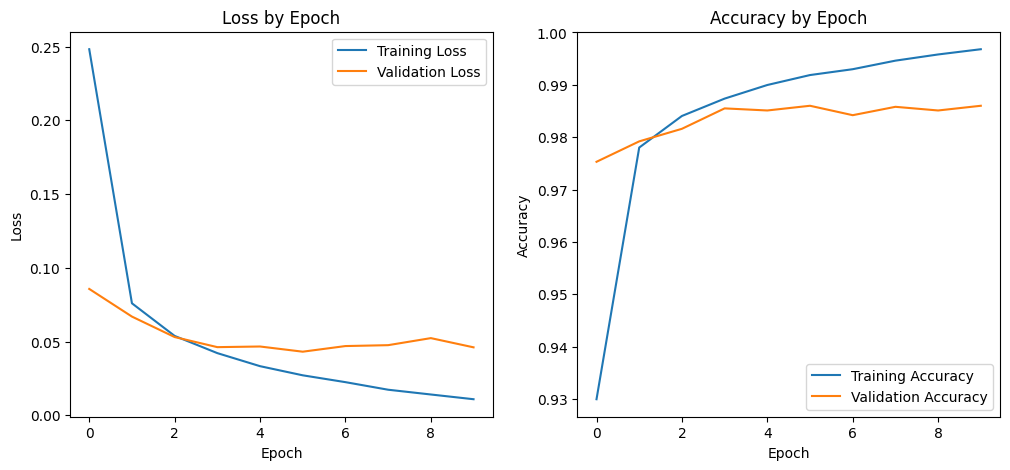

In [7]:
# Plot the training/validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy by Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
# Adam is selected because it combines the advantages of Adagrad and RMSProp, and is generally good for datasets like MNIST.
# The learning rate of 0.001 is chosen as it's a commonly recommended starting value for Adam, which often yields good results without further tuning.

# **Symmary :**
**WHY 0.001 was chosen:**
The learning rate of 0.001 is a widely accepted default for the Adam optimizer because it balances the need for quick convergence with the stability of the optimization process. This particular value is recommended in the seminal paper on Adam and has been empirically validated across various datasets and machine learning tasks. It's small enough to prevent the kind of aggressive weight updates that can cause the optimizer to overshoot the minimum of the loss function, yet large enough to avoid excessively slow convergence that can occur with smaller learning rates. Additionally, Adam's adaptive mechanism for adjusting the learning rate for individual weights capitalizes on this initial value, fine-tuning the learning process based on the observed gradient information. This default setting allows practitioners to focus more on model architecture and less on the nuances of optimizer tuning, providing a solid starting point that often leads to strong performance without the need for immediate adjustment.
# **Loss by Epoch**
**Training Loss:** It starts quite high but drops significantly and rapidly within the first epoch, suggesting that the model is learning quickly. After the initial drop, the loss continues to decrease but at a slower rate, which is expected as the model starts to converge.

**Validation Loss:** Mirrors the training loss closely, starting high and decreasing sharply in the first epoch. It continues to decrease but remains slightly above the training loss, which is a normal behavior indicating that the model is generalizing well to new data not seen during training.
# **Accuracy by Epoch**
**Training Accuracy**: It starts at approximately 93% and increases rapidly, reaching nearly 100% by the end of the training. This is a clear indication that the model is able to learn the training data very effectively.

**Validation Accuracy:** Begins slightly lower than the training accuracy but increases steadily. It does not quite reach the level of training accuracy, plateauing around 99%. The fact that it is slightly lower than the training accuracy is typical and suggests that there might be a slight overfitting to the training data, but given the high absolute value, the model is still performing very well.
# **Interpretation and Optimizer Selection**
The optimizer chosen for this CNN implementation seems to be effective given the high accuracy and low loss on both training and validation sets. The optimizer parameters .

